## 1. Data Loading
### Took 2017 - present data for resale flat prices from data.gov.sg

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../dataset/resale-flat-prices/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
df.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,275000.0
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,280000.0
7,2017-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1976,58 years 04 months,285000.0
8,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,285000.0
9,2017-01,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979,61 years 04 months,285000.0


## 2. Exploratory Data Analysis

In [3]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [4]:
for c in df.columns:
    print ("%s :" % c)
    print(df[c].value_counts())

month :
2021-08    2740
2021-07    2660
2021-11    2575
2018-07    2539
2021-09    2516
           ... 
2018-02    1183
2017-02    1085
2018-01    1072
2020-04     424
2020-05     363
Name: month, Length: 61, dtype: int64
town :
SENGKANG           10022
PUNGGOL             8606
WOODLANDS           8105
TAMPINES            8034
JURONG WEST         7966
YISHUN              7884
BEDOK               6436
HOUGANG             5799
CHOA CHU KANG       5270
ANG MO KIO          5015
BUKIT PANJANG       4639
BUKIT MERAH         4606
BUKIT BATOK         3942
TOA PAYOH           3806
PASIR RIS           3682
KALLANG/WHAMPOA     3404
QUEENSTOWN          3404
GEYLANG             2903
SEMBAWANG           2759
CLEMENTI            2697
JURONG EAST         2536
BISHAN              2319
SERANGOON           2286
CENTRAL AREA         988
MARINE PARADE        735
BUKIT TIMAH          323
Name: town, dtype: int64
flat_type :
4 ROOM              49202
5 ROOM              30102
3 ROOM              27598
EXECUT

In [5]:
for c in df.columns:
    print ("%s :" % c)
    print(df[c].unique())

month :
['2017-01' '2017-02' '2017-03' '2017-04' '2017-05' '2017-06' '2017-07'
 '2017-08' '2017-09' '2017-10' '2017-11' '2017-12' '2018-01' '2018-02'
 '2018-03' '2018-04' '2018-05' '2018-06' '2018-07' '2018-08' '2018-09'
 '2018-10' '2018-11' '2018-12' '2019-01' '2019-02' '2019-03' '2019-04'
 '2019-05' '2019-06' '2019-07' '2019-08' '2019-09' '2019-10' '2019-11'
 '2019-12' '2020-01' '2020-02' '2020-03' '2020-04' '2020-05' '2020-06'
 '2020-07' '2020-08' '2020-09' '2020-10' '2020-11' '2020-12' '2021-01'
 '2021-02' '2021-03' '2021-04' '2021-05' '2021-06' '2021-07' '2021-08'
 '2021-09' '2021-10' '2021-11' '2021-12' '2022-01']
town :
['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
flat_type :
['2 ROOM' '3 ROOM' '4

<AxesSubplot:>

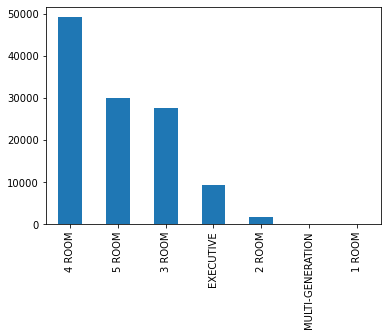

In [6]:
df.flat_type.value_counts().plot.bar()

### 1 Room and Multi Generation will be removed as it seems that that are not that many of it 

In [7]:
values = ['1 ROOM','MULTI-GENERATION']
df =df[df['flat_type'].isin(values)==False]

In [8]:
df.flat_type.unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE'], dtype=object)

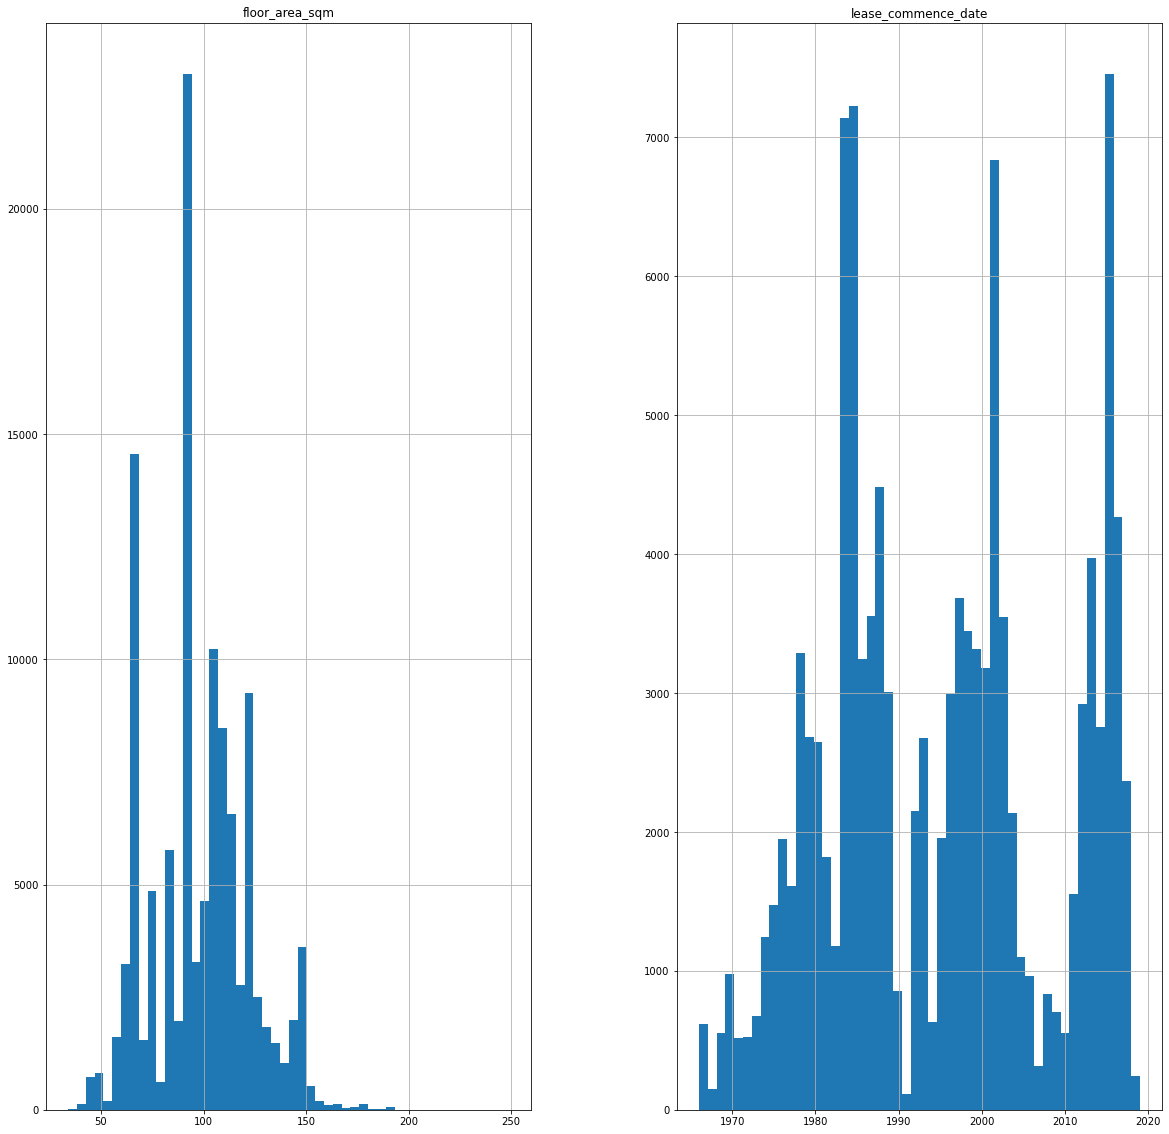

In [9]:
int_features=df.iloc[:,:-1]
int_features.hist(figsize=(20,20),bins=50)
plt.show()

In [10]:
display(df[df['floor_area_sqm'] > 200]['flat_model'].value_counts())

Terrace               6
Premium Maisonette    2
Maisonette            2
Name: flat_model, dtype: int64

In [11]:
df['remaining_lease'] = df['remaining_lease'].apply(lambda x: int(x[:2]))

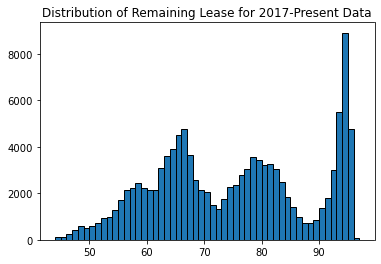

In [12]:
bins = df['remaining_lease'].max() - df['remaining_lease'].min()
plt.hist(df['remaining_lease'], bins=int(bins), edgecolor='black')
plt.title('Distribution of Remaining Lease for 2017-Present Data')
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118058 entries, 0 to 118164
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                118058 non-null  object 
 1   town                 118058 non-null  object 
 2   flat_type            118058 non-null  object 
 3   block                118058 non-null  object 
 4   street_name          118058 non-null  object 
 5   storey_range         118058 non-null  object 
 6   floor_area_sqm       118058 non-null  float64
 7   flat_model           118058 non-null  object 
 8   lease_commence_date  118058 non-null  int64  
 9   remaining_lease      118058 non-null  int64  
 10  resale_price         118058 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 10.8+ MB


In [14]:
df.tail(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
118160,2022-01,YISHUN,EXECUTIVE,654,YISHUN AVE 4,07 TO 09,164.0,Apartment,1992,69,825000.0
118161,2022-01,YISHUN,EXECUTIVE,392,YISHUN AVE 6,01 TO 03,142.0,Apartment,1988,65,660000.0
118162,2022-01,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,Apartment,1988,65,750000.0
118163,2022-01,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,65,709000.0
118164,2022-01,YISHUN,EXECUTIVE,640A,YISHUN ST 61,01 TO 03,159.0,Apartment,1992,69,800000.0


In [15]:
df2 = df.set_index('month').sort_index().loc['2017-01':'2019-12']
df2 = df2.reset_index()
df2 = df2[['month','flat_type','resale_price']]
df2['flat_type_year'] = df2['flat_type'] + ' - ' + df2['month'].apply(lambda x: str(x)[:4])

In [16]:
df2

,month,flat_type,resale_price,flat_type_year
0,2017-01,2 ROOM,232000.0,2 ROOM - 2017
1,2017-01,3 ROOM,250000.0,3 ROOM - 2017
2,2017-01,3 ROOM,262000.0,3 ROOM - 2017
3,2017-01,3 ROOM,265000.0,3 ROOM - 2017
4,2017-01,3 ROOM,265000.0,3 ROOM - 2017
...,...,...,...,...
64189,2019-12,EXECUTIVE,580000.0,EXECUTIVE - 2019
64190,2019-12,EXECUTIVE,565000.0,EXECUTIVE - 2019
64191,2019-12,EXECUTIVE,633000.0,EXECUTIVE - 2019
64192,2019-12,EXECUTIVE,788888.0,EXECUTIVE - 2019


Text(0.5, 51.0, 'Resale Price SGD ($)')

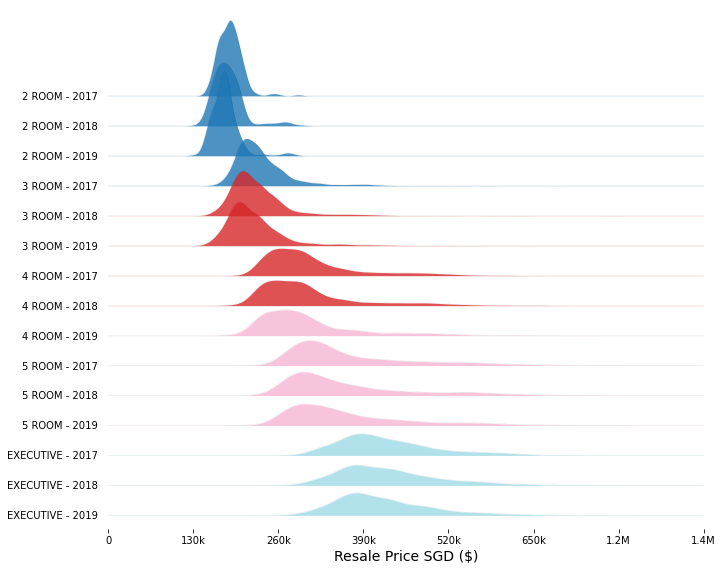

In [17]:
import joypy
fig, axes = joypy.joyplot(df2, by="flat_type_year", column="resale_price",figsize=(10,8),
             linewidth=0.05,overlap=1.5,alpha=0.8,colormap=plt.cm.get_cmap('tab20',4))
axes[-1].set_xlim([0,1400000])
axes[-1].set_xticklabels(['0', '130k', '260k', '390k', '520k', '650k', '1.2M','1.4M']) 
plt.xlabel('Resale Price SGD ($)', fontsize=14)

C:\Users\cleme\AppData\Local\Temp/ipykernel_12628/2173745796.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(['0', '130k', '260k', '390k', '520k', '650k', '1.2M','1.4M'])


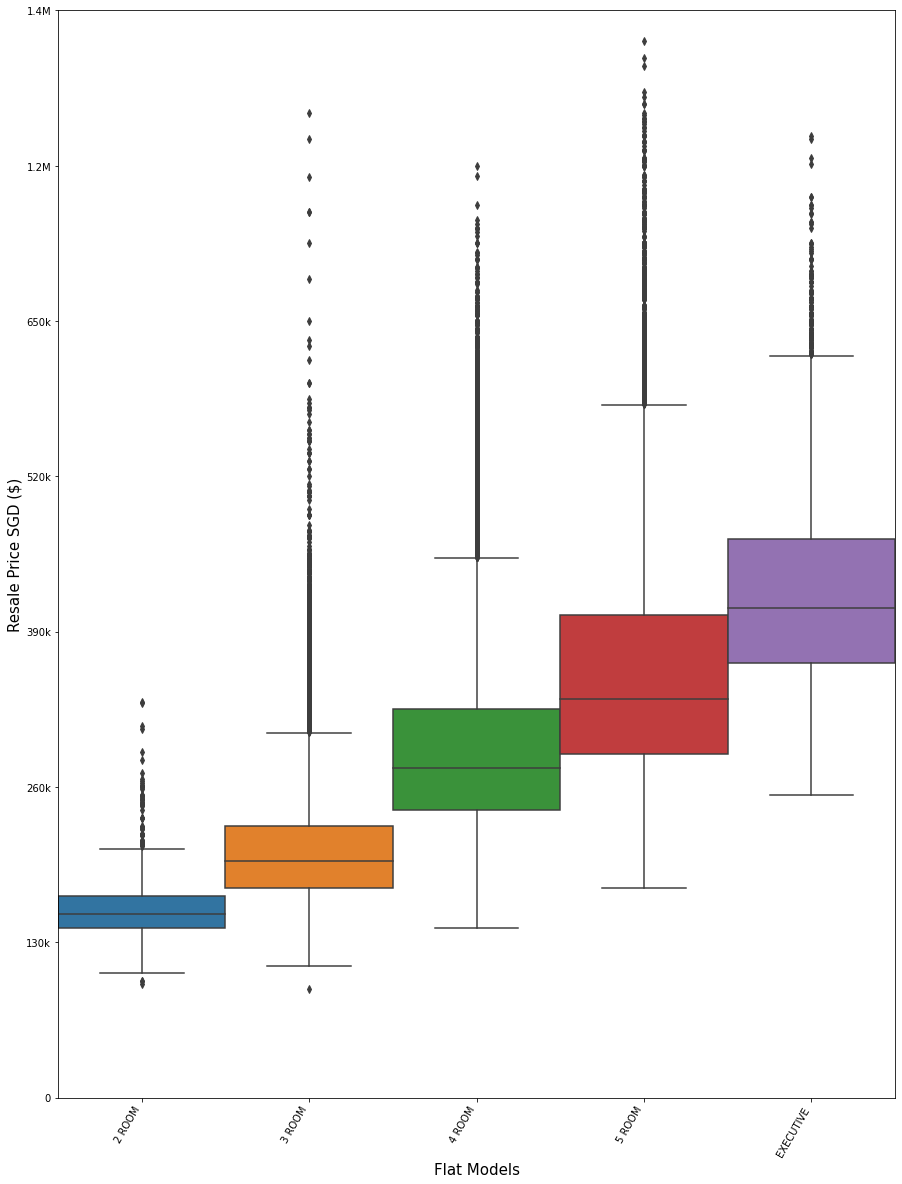

In [18]:
fig = plt.figure(figsize=(15,20))
p=sns.boxplot(x='flat_type', y='resale_price', data=df, width=1)
p.set_xticklabels(p.get_xticklabels(), rotation=60, ha='right'), p.set_xlabel('Flat Models', size=15)
plt.ylim(0,1400000)
p.set_yticklabels(['0', '130k', '260k', '390k', '520k', '650k', '1.2M','1.4M']) 
p.set_ylabel('Resale Price SGD ($)', size=15)
plt.show()

In [19]:
df.loc[df['flat_model']=="Maisonette"]

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
123,2017-01,BEDOK,EXECUTIVE,160,BEDOK STH AVE 3,01 TO 03,146.0,Maisonette,1986,68,670000.0
146,2017-01,BISHAN,EXECUTIVE,231,BISHAN ST 23,04 TO 06,146.0,Maisonette,1992,74,888000.0
147,2017-01,BISHAN,EXECUTIVE,134,BISHAN ST 12,04 TO 06,143.0,Maisonette,1986,68,895000.0
192,2017-01,BUKIT BATOK,EXECUTIVE,141,BT BATOK ST 11,10 TO 12,150.0,Maisonette,1984,66,664000.0
193,2017-01,BUKIT BATOK,EXECUTIVE,120,BT BATOK CTRL,01 TO 03,155.0,Maisonette,1985,67,680000.0
...,...,...,...,...,...,...,...,...,...,...,...
117949,2022-01,TAMPINES,EXECUTIVE,336,TAMPINES ST 32,04 TO 06,153.0,Maisonette,1996,73,785000.0
117983,2022-01,TOA PAYOH,EXECUTIVE,126,POTONG PASIR AVE 1,01 TO 03,151.0,Maisonette,1984,61,950000.0
117984,2022-01,TOA PAYOH,EXECUTIVE,125,POTONG PASIR AVE 1,01 TO 03,161.0,Maisonette,1984,61,985000.0
118053,2022-01,WOODLANDS,EXECUTIVE,636,WOODLANDS RING RD,01 TO 03,142.0,Maisonette,1999,76,675000.0


## 3. Feature Engineering

In [20]:
df = df.drop(['month','block','street_name','flat_model','remaining_lease'],axis='columns')
df.shape
df.head(10)

,town,flat_type,storey_range,floor_area_sqm,lease_commence_date,resale_price
0,ANG MO KIO,2 ROOM,10 TO 12,44.0,1979,232000.0
1,ANG MO KIO,3 ROOM,01 TO 03,67.0,1978,250000.0
2,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,262000.0
3,ANG MO KIO,3 ROOM,04 TO 06,68.0,1980,265000.0
4,ANG MO KIO,3 ROOM,01 TO 03,67.0,1980,265000.0
5,ANG MO KIO,3 ROOM,01 TO 03,68.0,1981,275000.0
6,ANG MO KIO,3 ROOM,04 TO 06,68.0,1979,280000.0
7,ANG MO KIO,3 ROOM,04 TO 06,67.0,1976,285000.0
8,ANG MO KIO,3 ROOM,04 TO 06,68.0,1979,285000.0
9,ANG MO KIO,3 ROOM,01 TO 03,67.0,1979,285000.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118058 entries, 0 to 118164
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 118058 non-null  object 
 1   flat_type            118058 non-null  object 
 2   storey_range         118058 non-null  object 
 3   floor_area_sqm       118058 non-null  float64
 4   lease_commence_date  118058 non-null  int64  
 5   resale_price         118058 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 10.3+ MB


In [22]:
df['flat_type']= df['flat_type'].map({'2 ROOM': 0, '3 ROOM': 1,'4 ROOM': 2, '5 ROOM': 3, 
                                                'EXECUTIVE': 4}).astype(int)

In [23]:
df = df.sort_values(by='storey_range')
df['storey_range'] = df['storey_range'].astype('category').cat.codes

In [24]:
dummies = pd.get_dummies(df.town)
df = pd.concat([df,dummies],axis='columns')
df=df.drop('town',axis='columns')
df.head(10)

,flat_type,storey_range,floor_area_sqm,lease_commence_date,resale_price,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
59089,3,0,121.0,1999,470000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51319,2,0,106.0,1984,290000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51318,2,0,108.0,1988,285000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51317,2,0,85.0,2002,280000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51312,1,0,75.0,1984,280000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51306,1,0,76.0,1984,265000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51304,1,0,72.0,1984,258000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51296,1,0,59.0,1978,202000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51293,1,0,59.0,1975,193000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51289,4,0,156.0,1984,595000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118058 entries, 59089 to 83335
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   flat_type            118058 non-null  int32  
 1   storey_range         118058 non-null  int8   
 2   floor_area_sqm       118058 non-null  float64
 3   lease_commence_date  118058 non-null  int64  
 4   resale_price         118058 non-null  float64
 5   ANG MO KIO           118058 non-null  uint8  
 6   BEDOK                118058 non-null  uint8  
 7   BISHAN               118058 non-null  uint8  
 8   BUKIT BATOK          118058 non-null  uint8  
 9   BUKIT MERAH          118058 non-null  uint8  
 10  BUKIT PANJANG        118058 non-null  uint8  
 11  BUKIT TIMAH          118058 non-null  uint8  
 12  CENTRAL AREA         118058 non-null  uint8  
 13  CHOA CHU KANG        118058 non-null  uint8  
 14  CLEMENTI             118058 non-null  uint8  
 15  GEYLANG       

In [26]:
X = df.drop(['resale_price'],axis='columns')
X.shape

(118058, 30)

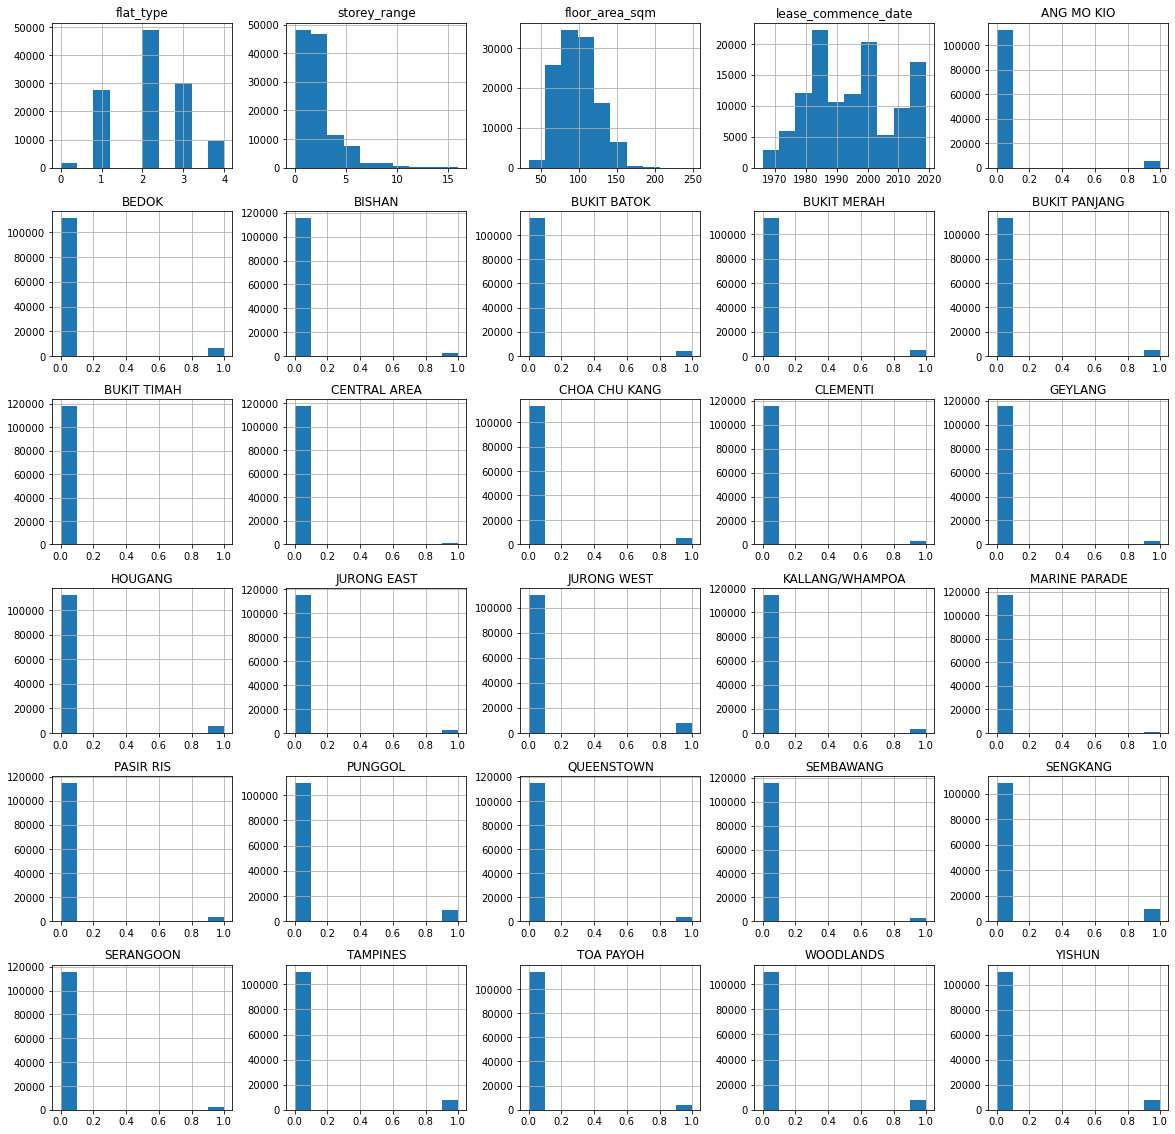

In [27]:
X.hist(figsize=(20,20))
plt.show()

## 4. Model Training

In [28]:
y = df["resale_price"]
y.shape

(118058,)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (106252, 30)
Shape of X_test: (11806, 30)
Shape of y_train: (106252,)
Shape of y_test: (11806,)


In [30]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(oob_score=True)
rfr.fit(X, y) 
rfr.score(X_test,y_test)

0.9582688217999127

In [31]:
rfr.oob_score_

0.9348810676799673

In [32]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr.score(X_test,y_test)

0.9279607522259483

In [33]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)

rfr_cv = cross_val_score(RandomForestRegressor(), X, y, cv=cv)
print(rfr_cv)

dtr_cv = cross_val_score(DecisionTreeRegressor(), X, y, cv=cv)
print(dtr_cv)

[0.93650503 0.93556562 0.93338107 0.93268616 0.93537808]
[0.92796363 0.92799416 0.92595399 0.92358294 0.9281959 ]


In [34]:
from sklearn.model_selection import GridSearchCV

def find_best_model_using_gridsearchcv(X,y):
    algos = {

        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                "n_estimators"      : [100,200,300,400,500],
                "max_features"      : ["auto", "sqrt", "log2"],
                "min_samples_split" : [2,4,8],

            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

best_model=find_best_model_using_gridsearchcv(X,y)

In [37]:
best_model

,model,best_score,best_params
0,random_forest,0.937650,"{'max_features': 'sqrt', 'min_samples_split': ..."
1,decision_tree,0.927713,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [38]:
import pickle
with open('hdb_resale_price_pred.pickle','wb') as f:
    pickle.dump(rfr,f)

In [39]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))